In [1]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

from param import *

sns.set_theme(style="whitegrid")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

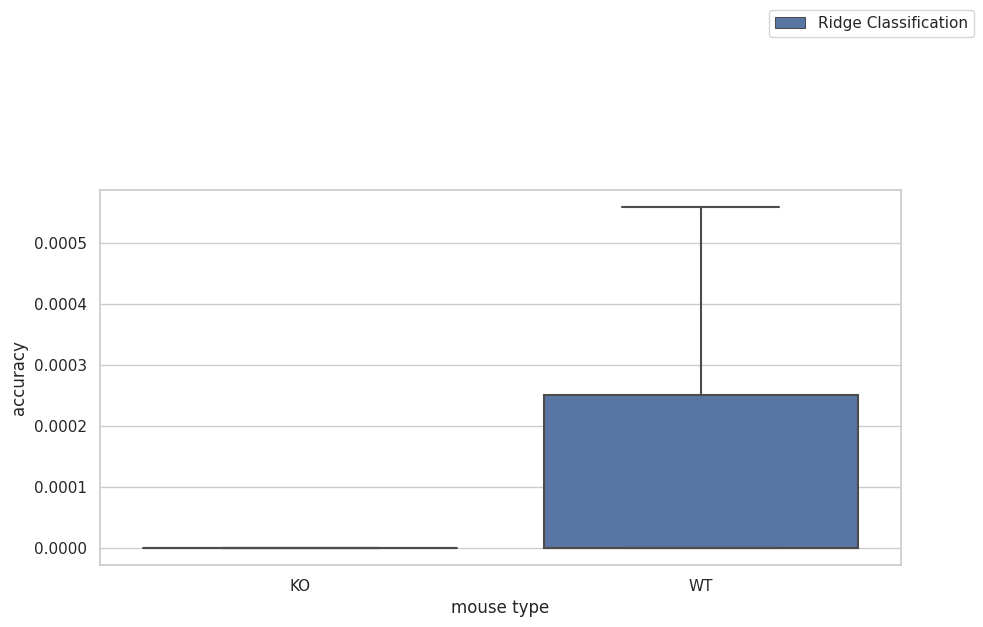

In [2]:
fig, ax = plt.subplots(figsize=(10,6), tight_layout = True, sharey=True)
file_model = [
    ("tsc_train_LEM_Ridge_threshold_segment_False", "Ridge Classification"),
    # ("tsc_train_LEM_Ridge_threshold_segment_events shuffling", "Ridge Events Shuffle"),
    # ("tsc_train_LEM_Ridge_threshold_segment_behavior shuffling", "Ridge Behavior Shuffle")
]
accu_list = []
for file_name, model in file_model:
    for m_id, data_dir in enumerate(datalist):
        data_name = str(data_dir).split('/')[-1]
        with open(ParamDir().output_dir/data_name/(f"{file_name}.pickle"),"rb") as f:
            results = pickle.load(f)
        accu = np.mean(results["scores"])
        if "KO" in data_name:
            accu_list.append((accu, "KO", model))
        else:
            accu_list.append((accu, "WT", model))

df = pd.DataFrame(accu_list, columns=["score", "mouse type", "model"])
sns.boxplot(x="mouse type", y ="score", hue="model", data=df, ax=ax)
ax.set_ylabel("accuracy")
ax.legend(bbox_to_anchor=(1.1, 1.5))


In [3]:
results["scores"]

array([0.        , 0.        , 0.        , 0.        , 0.00502513,
       0.        , 0.        , 0.        , 0.        , 0.        ])